In [1]:
# Data management code, scroll to next cell for analysis
import pandas as pd
from pandas import Series,DataFrame

# BLS dataset for labor participation
# http://www.bls.gov/lau/staadata.zip
bls_file = pd.ExcelFile('staadata.xlsx')
# Parse the first sheet of the excel file and set as DataFrame
header = ['FIPS Code', 'State', 'Year', 'Civilian non-institutional population',
           'Civilian labor force Total', 'CLF Percent of population', 'CLF Employment Total',
           'CLF Employment Percent of population', 'CLF Unemployment Total',
           'CLF Unemployment Rate'
          ]
bls = bls_file.parse('Sheet1', skiprows=7, names=header)
bls12 = bls[bls.Year == 2012]
bls12 = bls12[['State','CLF Employment Percent of population','CLF Unemployment Rate']]
bls12['CLF Employment Percent of population'] = pd.to_numeric(bls12['CLF Employment Percent of population'])
bls12['CLF Unemployment Rate'] = pd.to_numeric(bls12['CLF Unemployment Rate'])
bls12.set_index('State')

# 2012 Election data to determine if a state is "red" or "blue"
# http://www.fec.gov/pubrec/fe2012/federalelections2012.shtml
pres_file = pd.ExcelFile('2012pres.xls')
pres = pres_file.parse('2012 Pres General Results')
pres = pres.drop([1, 'FEC ID', 'STATE ABBREVIATION', 'GENERAL ELECTION DATE'], axis=1)
Dem = pres[pres['LAST NAME'] == 'Obama'].set_index('STATE')
Rep = pres[pres['LAST NAME'] == 'Romney'].set_index('STATE')
Dem_Rep = pd.DataFrame(Dem['GENERAL %'] - Rep['GENERAL %'])
Dem_Rep.rename(columns={'GENERAL %': 'Percent Obama Over Romney'}, inplace=True)
Dem_Rep.reset_index(level=0, inplace=True)
winner = pres[pres['WINNER INDICATOR'] == 'W']
winner = winner[['STATE','LAST NAME', 'GENERAL %']]
winner.rename(columns={'LAST NAME': 'Winner', 'GENERAL %': 'PercentOfVote'}, inplace=True)

# Load income per capita as response variable
# https://en.wikipedia.org/wiki/List_of_U.S._states_by_income
income = pd.read_csv('per_capita_income.csv', low_memory=False)
income = income[[1, 2]]
income.set_index('State')
income.rename(columns={'Per capita\nincome': 'IncomePerCapita'}, inplace=True)
income['IncomePerCapita'] = income['IncomePerCapita'].apply(
    lambda x: x.replace('$', '').replace(',', ''))
income['IncomePerCapita'] = pd.to_numeric(income['IncomePerCapita'])

# Load 2012 SAT score average
# http://www.ipsr.ku.edu/ksdata/ksah/education/
sat_2012 = pd.read_csv('avg_SAT_2012.csv', low_memory=False)
sat_2012 = sat_2012[['State', 'Combined']]
sat_2012.rename(columns={'Combined': 'avg_SAT_2012'}, inplace=True)
sat_2012['avg_SAT_2012'] = pd.to_numeric(sat_2012['avg_SAT_2012'])
sat_2012.set_index('State')
# Tennessee got drop for some reason?
df2 = pd.DataFrame([['Tennessee', 1709]],columns=['State', 'avg_SAT_2012'])
sat_2012 = pd.concat([df2,sat_2012])

# Merge data sets
data = pd.merge(Dem_Rep, income, left_on='STATE', right_on='State')
data.drop(['State'], axis=1, inplace=True)
data = pd.merge(data, winner, left_on='STATE', right_on='STATE')
data = pd.merge(data, sat_2012, left_on='STATE', right_on='State')
data = pd.merge(data, bls12).drop(['STATE'], axis=1).set_index('State')

data.rename(columns={'CLF Employment Percent of population': 'Labor Participation',
                    'CLF Unemployment Rate': 'Unemployment2012'}, inplace=True)

data['Percent Obama Over Romney'] = pd.to_numeric(data['Percent Obama Over Romney'])
data['Labor Participation'] = pd.to_numeric(data['Labor Participation'])
data['Unemployment2012'] = pd.to_numeric(data['Unemployment2012'])

data.reset_index(level=['State'], inplace=True)
data_clean = data.drop_duplicates('State', keep='first')
print("Shouldn't shape be 51?")
print(data_clean.shape)
data_clean

Shouldn't shape be 51?
(49, 8)


,State,Percent Obama Over Romney,IncomePerCapita,Winner,PercentOfVote,avg_SAT_2012,Labor Participation,Unemployment2012
0,Alabama,-0.221868,23606,Romney,0.605458,1608,53.4,8.0
1,Alaska,-0.139889,33062,Romney,0.548016,1495,63.4,7.1
2,Arizona,-0.090648,25715,Romney,0.536545,1551,55.5,8.3
3,Arkansas,-0.236879,22883,Romney,0.605669,1697,54.8,7.6
4,California,0.231186,30441,Obama,0.602390,1505,56.6,10.4
5,Colorado,0.053652,32357,Obama,0.514921,1721,63.6,7.9
6,Connecticut,0.173315,39373,Obama,0.580568,1532,60.9,8.3
7,Delaware,0.186267,30488,Obama,0.586064,1351,57.4,7.2
8,District of Columbia,0.836348,45877,Obama,0.909131,1400,62.9,9.0
9,Florida,0.008769,26582,Obama,0.500079,1457,55.5,8.5


In [2]:
# Split into into training and testing set
from sklearn.cross_validation import train_test_split
predictors = data_clean[['avg_SAT_2012','IncomePerCapita',
                   'Unemployment2012', 'Labor Participation']]

targets = data_clean[['Winner']]
expl_train, expl_test, tar_train, tar_test = train_test_split(
    predictors, targets, test_size=.25)

print(expl_train.shape)
print(expl_test.shape)

(36, 4)
(13, 4)


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

classifier=DecisionTreeClassifier()
classifier=classifier.fit(expl_train,tar_train)

predictions=classifier.predict(expl_test)

print(sklearn.metrics.confusion_matrix(tar_test,predictions))
print(sklearn.metrics.accuracy_score(tar_test,predictions))

[[4 2]
 [1 6]]
0.769230769231


If you don't have the required libraries:
> sudo apt-get install graphviz,
then !pip install graphviz and pydotplus

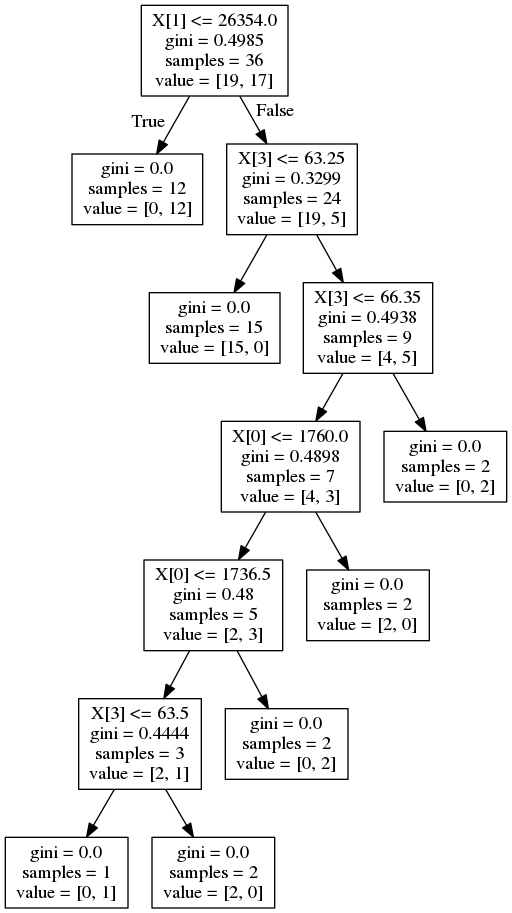

In [4]:
#Displaying the decision tree
from sklearn import tree
from io import StringIO
#from io import BytesIO as StringIO
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())